# `ex8_4_4` Instance

## construct model

In [1]:
from NSPLIB.src.instances.ex8_4_4.ex8_4_4_SP import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
import numpy as np
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
bound_0 = {'x10': [-0.2319097296336097, -0.23068380843377104], 'x11': [1.2243856308392167, 1.2256115520390556], 'x12': [0.052024428201078145, 0.05325034940091684], 'x13': [0.560807251262921, 0.5620331724627596], 'x14': [0.6211002050003208, 0.6223261262001595], 'x15': [1.1, 1.1006129605999195], 'x16': [0.8062556795688667, 0.8074816007687053], 'x17': [0.6625485067385226, 0.6637744279383613], 'x6': [-1.1376259471017338, -1.136400025901895], 'x7': [1.5973628758260132, 1.598588797025852], 'x8': [-0.5993034659354952, -0.5980775447356566], 'x9': [1.3717526206051045, 1.3729785418049434]}
m.update_y_bound(bound_0)
alg = CaoZavalaAlgo(m, solver='baron')
alg.solve(max_iter=1e8, max_time=3600*24, tol=1e-3,ubd_midpt_fix=0,ubd_local_solve=0,ubd_provided=0.33272286571778786)

Solving the problem via SBB...
	Maximum iteration: 100000000.0
	Maximum time: 86400
	Tolerance: 1E-03
Initialize the model...
	Root node lower bound: 0.33, upper bound: 0.33
	Total initialization CPU time: 0.12 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1         0.32         1.75       0.3314       0.3327   0.3983%
         2         0.45         2.85       0.3314       0.3327   0.3978%
         3         0.57         3.99       0.3317       0.3327   0.3156%
         4         0.68         5.08       0.3317       0.3327   0.3156%
         5         0.80         6.18       0.3317       0.3327   0.3156%
         6         0.91         7.28       0.3317       0.3327   0.3156%
         7         1.02         8.38       0.3317       0.3327   0.3156%
         8         1.14         9.48       0.3317       0.3327   0.3156%
         9         1.25        10.59       0.3317       0.3327   0.3155%
        10         1.37        

KeyboardInterrupt: 

In [2]:
keep=[]
for node in range(0,147):
    temp=0
    for i in alg.node_list.nodes[node].bound.values():
        if i[1]-i[0]>temp:
            temp=i[1]-i[0]
    keep.append(temp)
print(min(keep))

0.000449504439940851


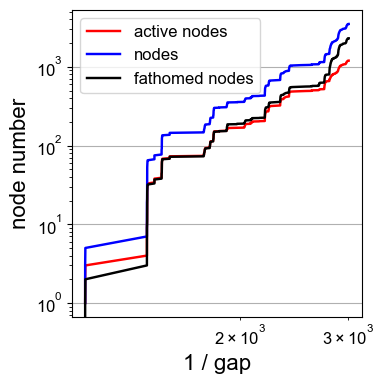

In [5]:
alg.res.plot_bb_n_gap(plot_method="loglog")

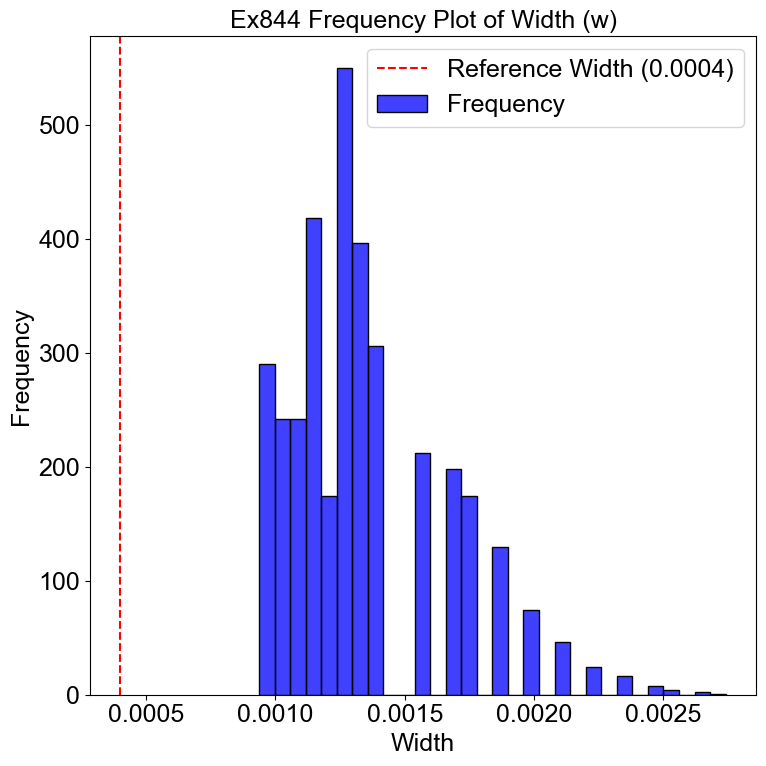

In [4]:
import seaborn as sns

sns.histplot(w, bins=30, kde=False, color='blue', label='Frequency')
plt.axvline(0.0004, color='red', linestyle='dashed', linewidth=1.5, label='Reference Width (0.0004)')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Ex844 Frequency Plot of Width (w)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Ex844 Width vs Node Index')

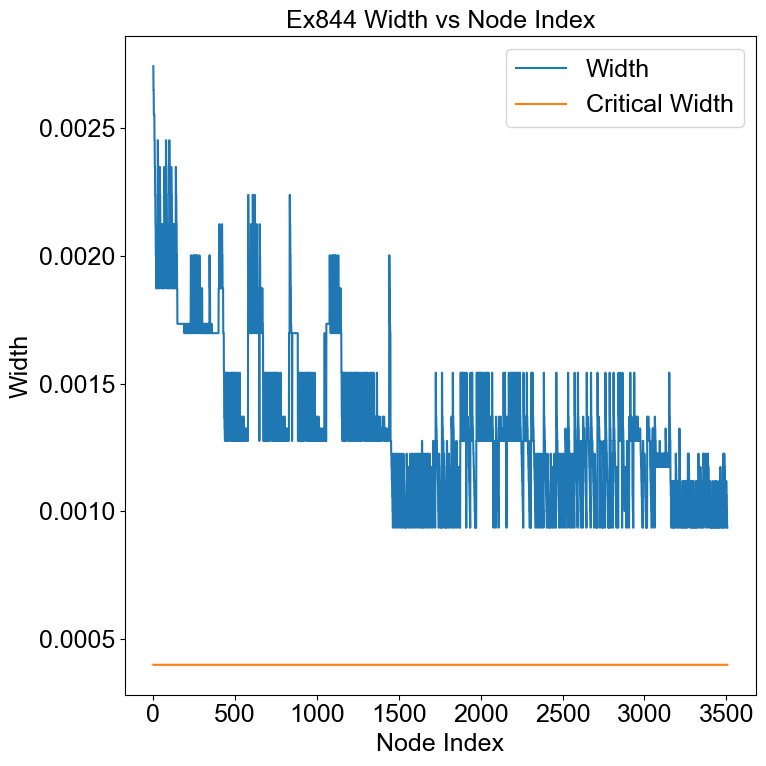

In [3]:
import matplotlib.pyplot as plt
plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-8-8', 'fontsize']])
w=[]
for i in range(0,3507):
    a=alg.node_list.nodes[i].bound
    w.append(sum([(i[1]-i[0])**2 for i in a.values()])**0.5)
n = len(w)
vector_of_ones = [0.0004] * n
plt.plot(w,label='Width')
plt.plot(vector_of_ones,label='Critical Width')
plt.xlabel('Node Index')
plt.ylabel('Width')
plt.legend()
plt.title('Ex844 Width vs Node Index')

## SBB run

In [2]:
alg = CaoZavalaAlgo(m, solver='baron')

# # SBB solve
alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-3,ubd_midpt_fix=0)
# alg.save_res(model_name='pooling')

# load previous results
# alg.load_res(path='_results/ex844/04212023_160601_artificial_ubd.pickle')
# alg.res.plot_bb_n_gap('loglog')

Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 28800
	Tolerance: 1E-03
Initialize the model...
	Root node lower bound: 0.32, upper bound: 0.33
	Total initialization CPU time: 0.76 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1         2.57         2.62         0.32         0.33      4.7%
         2         3.98         4.06         0.32         0.33      4.7%
         3         5.74         5.84         0.32         0.33      4.7%
         4         6.44         6.56         0.32         0.33      4.7%
         5         7.81         7.95         0.32         0.33      4.7%
         6         8.64         8.80         0.32         0.33      4.7%
         7        10.50        10.68         0.32         0.33      4.7%
         8        11.38        11.58         0.32         0.33      4.7%
         9        12.20        12.43         0.32         0.33      4.7%
        10        12.69        12.

KeyboardInterrupt: 

In [3]:
alg.res.abs_gaps

[0.015756967808737588,
 0.0157569678087377,
 0.015756967808737588,
 0.015756967808737588,
 0.015756967808737588,
 0.015756967808737643,
 0.015756967808737532,
 0.015756967808737476,
 0.015756967808737532,
 0.015756967808737588,
 0.015756967808737588,
 0.015756967808737365,
 0.015756967808737365,
 0.015756967808737365,
 0.01575696780873731,
 0.01575696780873731,
 0.01575696780873742,
 0.015756967808737365,
 0.01575696780873742,
 0.015756967808737365,
 0.015756967808737365,
 0.01575696780873731,
 0.01575696780873742,
 0.01575696780873742,
 0.01575696780873731,
 0.01575696780873731,
 0.01575696780873731,
 0.01575696780873731,
 0.01575696780873742,
 0.01575696780873731,
 0.015756967808737143,
 0.01575696780873731,
 0.01575696780873731,
 0.01575696780873731,
 0.014905338970258308,
 0.014905338970213178,
 0.014905338892704234,
 0.014905338892704234,
 0.014790164696697305,
 0.014790164314712417,
 0.014790164269887718,
 0.014790164269887829,
 0.014154048270392516,
 0.014154046927144337,
 0.014

In [1]:

from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
from NSPLIB.src.instances.ex8_4_4.ex8_4_4_SP import const_model

sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg = CaoZavalaAlgo(m, solver='baron')
ca = HausdorffAnalyzer(alg)
from pyomo.opt import SolverFactory
orig_m=m.origin_model
solver = SolverFactory('baron')
result=solver.solve(orig_m,tee=True)
y_val={i: orig_m.y[i].value for i in orig_m.y}

v_val=0.332723
eps_min = -6
eps_max = -1
steps = 6

tol = 1e-9

eps_list, distances = ca.analyze(y=y_val,y_optimal=True, v=v_val, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)

Building models...
Done.


 BARON version 24.9.12. Built: OSX-64 Thu Sep 12 14:02:57 EDT 2024
 Running on machine Jingzhis-MacBook-Air.local

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Jingzhi Yang at University of System of Georgia, jyang872@gatech.edu.

 If you publish work using this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC                                         
 For NLP: FILTERSQP
 Doing local search
 Preprocessing found feasible solution with value 0.332724
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration       Time (s)     Mem   Lower bound     Upper bound   Progress
          1           0.08    12MB     0.

Calculating the Hausdorff distances...
	diameter = 1.0E-01, distance = 1.58E-02


v:  0.332723
lbd:  0.31696683845260304


	diameter = 1.0E-02, distance = 8.28E-03


v:  0.332723
lbd:  0.3244383484840638


	diameter = 1.0E-03, distance = 1.09E-03


v:  0.332723
lbd:  0.3316300562793584


	diameter = 1.0E-04, distance = 1.16E-04


v:  0.332723
lbd:  0.3326066757360825


	diameter = 1.0E-05, distance = 1.17E-05


v:  0.332723
lbd:  0.33271125818612596


	diameter = 1.0E-06, distance = 5.27E-06
Done!


v:  0.332723
lbd:  0.3327177296510725


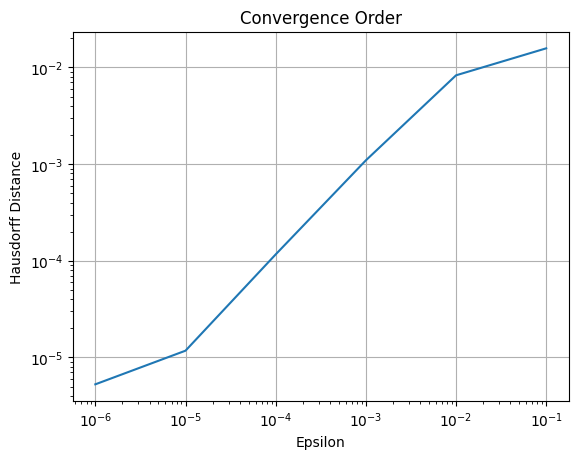

In [2]:
import matplotlib.pyplot as plt
plt.plot(eps_list, distances)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Hausdorff Distance')
plt.title('Convergence Order')
plt.grid(True)
plt.show()

In [2]:
orig_m.y.pprint()

y : Size=12, Index={x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17}
    Key : Lower : Value                : Upper : Fixed : Stale : Domain
    x10 :  -1.2 :  -0.2312967690336901 :   0.8 : False :  True :  Reals
    x11 :   0.1 :   1.2253372994313552 :   2.1 : False :  True :  Reals
    x12 :  -1.1 : 0.052630832446715556 :   0.9 : False :  True :  Reals
    x13 :     0 :   0.5618257692680865 :     1 : False :  True :  Reals
    x14 :     0 :   0.6216502181350324 :     1 : False :  True :  Reals
    x15 :   1.1 :   1.1000095777262031 :   1.3 : False :  True :  Reals
    x16 :     0 :   0.8068436769745404 :     1 : False :  True :  Reals
    x17 :     0 :   0.6631451887968607 :     1 : False :  True :  Reals
     x6 :    -2 :  -1.1369964050673889 :     0 : False :  True :  Reals
     x7 :   0.5 :   1.5982806594034324 :   2.5 : False :  True :  Reals
     x8 :  -1.5 :  -0.5986830473820272 :   0.5 : False :  True :  Reals
     x9 :   0.2 :   1.3726907085349922 :   2.2 : False :  Tr

In [1]:
from src.analyses.value_function import ValueFunction
from NSPLIB.src.instances.ex8_4_4.ex8_4_4_SP import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
v_f = ValueFunction(m, solver='scip')
from pyomo.opt import SolverFactory
orig_m=m.origin_model
solver = SolverFactory('baron')
result=solver.solve(orig_m,tee=True)
y_val={i: orig_m.y[i].value for i in orig_m.y}
"""
Key : Lower : Value                : Upper : Fixed : Stale : Domain
    x10 :  -1.2 :  -0.2312967690336901 :   0.8 : False : False :  Reals
    x11 :   0.1 :   1.2253372994313552 :   2.1 : False : False :  Reals
    x12 :  -1.1 : 0.052630832446715556 :   0.9 : False : False :  Reals
    x13 :     0 :   0.5618257692680865 :     1 : False : False :  Reals
    x14 :     0 :   0.6216502181350324 :     1 : False : False :  Reals
    x15 :   1.1 :   1.1000095777262031 :   1.3 : False : False :  Reals
    x16 :     0 :   0.8068436769745404 :     1 : False : False :  Reals
    x17 :     0 :   0.6631451887968607 :     1 : False : False :  Reals
     x6 :    -2 :  -1.1369964050673889 :     0 : False : False :  Reals
     x7 :   0.5 :   1.5982806594034324 :   2.5 : False : False :  Reals
     x8 :  -1.5 :  -0.5986830473820272 :   0.5 : False : False :  Reals
     x9 :   0.2 :   1.3726907085349922 :   2.2 : False : False :  Reals
"""
idx_1 = 'x10'
idx_2 = 'x11'

val_1 = y_val[idx_1]
val_2 = y_val[idx_2]

eps = 0.01

interval_1 = (y_val[idx_1]-eps, y_val[idx_1]+eps)
interval_2 = (y_val[idx_2]-eps, y_val[idx_2]+eps)

v_f.calc_2D(idx_1, idx_2, y_val.copy(), interval_1=interval_1, interval_2=interval_2, step=5)

Building models...
Done.


 BARON version 24.9.12. Built: OSX-64 Thu Sep 12 14:02:57 EDT 2024
 Running on machine Jingzhis-MacBook-Air.local

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Jingzhi Yang at University of System of Georgia, jyang872@gatech.edu.

 If you publish work using this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC                                         
 For NLP: FILTERSQP
 Doing local search
 Preprocessing found feasible solution with value 0.332724
 Solving bounding LP
 Starting multi-start local search
 Done with local search
  Iteration       Time (s)     Mem   Lower bound     Upper bound   Progress
          1           0.08    12MB     0.

({0: array([[-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf]]),
  1: array([[-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf]]),
  2: array([[-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf],
         [-inf, -inf, -inf, -inf, -inf]])},
 array([[-inf, -inf, -inf, -inf, -inf],
        [-inf, -inf, -inf, -inf, -inf],
        [-inf, -inf, -inf, -inf, -inf],
        [-inf, -inf, -inf, -inf, -inf],
        [-inf, -inf, -inf, -inf, -inf]]))

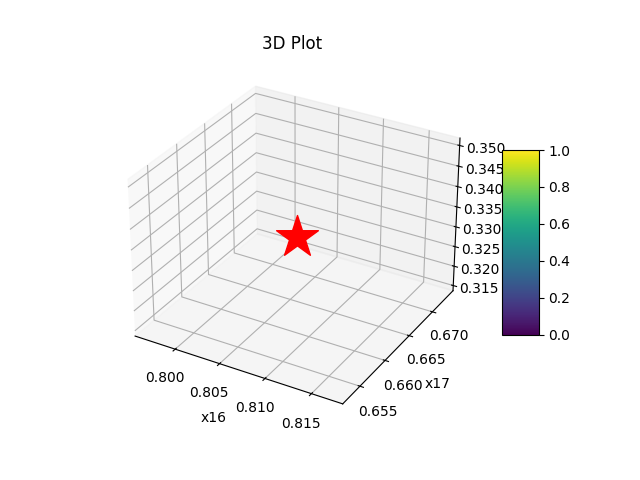

In [3]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(v_f.y_mesh[0], v_f.y_mesh[1], v_f.value_func[1], cmap='viridis')
fig.colorbar(surf,  ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel(idx_1)
ax.set_ylabel(idx_2)
ax.set_zlabel('Z')  # Replace 'Z' with the appropriate label
ax.scatter(y_val[idx_1], y_val[idx_2], 0.332723, c='red', marker='*', s=1000)
plt.title('3D Plot')
plt.show()